In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
img_num = 5000
preprocess_img_path = './raw_images'
processed_img_path = './processed_images'

if not os.path.exists("processed_images"):
    os.mkdir("processed_images")

for idx in tqdm(range(1, img_num+1)):
    raw_img = cv2.imread(preprocess_img_path + '/' + str(idx) + '.jpg')

    raw_img = cv2.resize(raw_img, (144, 48), interpolation=cv2.INTER_CUBIC)
    clear_img = cv2.fastNlMeansDenoisingColored(raw_img, None, 30, 30, 7, 21)

    ret, thresh = cv2.threshold(clear_img, 127, 255, cv2.THRESH_BINARY_INV)
    image = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
    image_copy = image.copy()

    image_copy[:, 13:-5] = 0
    axis_y, axis_x = np.where(image_copy == 255)

    x1_s = np.array([axis_x])
    y1_s = 48 - axis_y
    poly_reg = PolynomialFeatures(degree=2)
    x1_t = poly_reg.fit_transform(x1_s.T)
    lr = LinearRegression()
    lr.fit(x1_t, y1_s)
    x2_s = np.array([[i for i in range(0, 140)]])
    x2_t = poly_reg.fit_transform(x2_s.T)
    for x, y in np.column_stack([lr.predict(x2_t).round(0), x2_s[0]]):
        pos = 48 - int(x)
        image[pos-3:pos+3, int(y)] = 255 - image[pos-3:pos+3, int(y)]

    cv2.imwrite(processed_img_path + '/' + str(idx) + '.jpg', image)

100%|██████████| 5000/5000 [06:50<00:00, 12.18it/s]


## Example

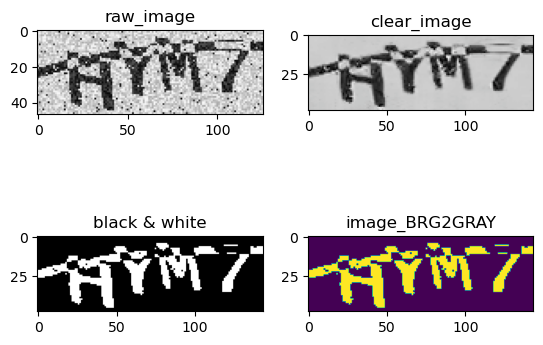

In [41]:
# read image
img_path = r'raw_images/'
img_id = 1314

raw_img = cv2.imread(img_path + str(img_id) + '.jpg')
plt.figure()
plt.subplot(2,2,1).set_title('raw_image')
plt.imshow(raw_img)

# 去除雜訊
raw_img = cv2.resize(raw_img, (144, 48), interpolation=cv2.INTER_CUBIC)
clear_img = cv2.fastNlMeansDenoisingColored(raw_img, None, 30, 30, 7, 21)
plt.subplot(2,2,2).set_title('clear_image')
plt.imshow(clear_img)

# 黑白化
ret, thresh = cv2.threshold(clear_img, 127, 255, cv2.THRESH_BINARY_INV)
plt.subplot(2,2,3).set_title('black & white')
plt.imshow(thresh)

image = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
image_copy = image.copy()
plt.subplot(2,2,4).set_title('image_BRG2GRAY')
plt.imshow(image_copy)

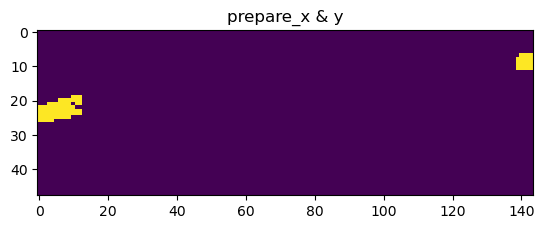

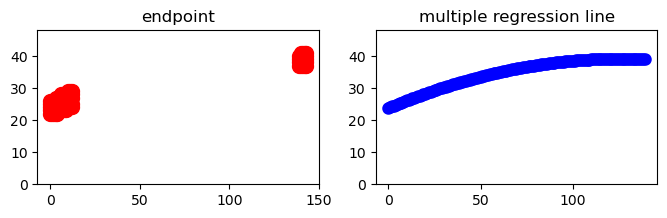

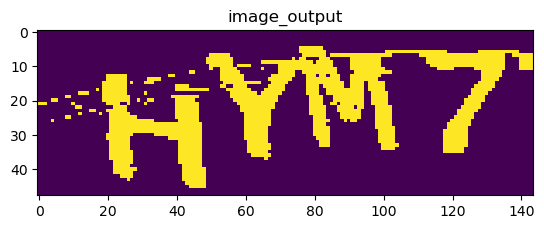

In [42]:
# 留下左右線段
image_copy[:, 13:-5] = 0
plt.figure()
plt.title('prepare_x & y')
plt.imshow(image_copy)

axis_y, axis_x = np.where(image_copy == 255)

# 繪製二次曲線填補缺線
x1_s = np.array([axis_x])
y1_s = 48 - axis_y
poly_reg = PolynomialFeatures(degree=2)
x1_t = poly_reg.fit_transform(x1_s.T)
lr = LinearRegression()
lr.fit(x1_t, y1_s)
x2_s = np.array([[i for i in range(0, 140)]])
x2_t = poly_reg.fit_transform(x2_s.T)

plt.figure(figsize = (8, 2))
plt.subplot(1,2,1).set_title('endpoint')
plt.scatter(axis_x, y1_s, s = 100, c = 'red', label = 'Cluster')
plt.ylim(ymin = 0)
plt.ylim(ymax = 48)

plt.subplot(1,2,2).set_title('multiple regression line')
plt.scatter(x2_s.T, lr.predict(x2_t), c = 'blue', linewidths=3)
plt.ylim(ymin = 0)
plt.ylim(ymax = 48)
plt.show()

for x, y in np.column_stack([lr.predict(x2_t).round(0), x2_s[0]]):
    pos = 48 - int(x)
    image[pos-3:pos+3, int(y)] = 255 - image[pos-3:pos+3, int(y)]
plt.figure()
plt.title('image_output')
plt.imshow(image)